## 회귀 분석

### 목차
* 선형회귀분석
* 다중회귀분석
* Boston집값 분석

>회귀분석 : 독립 변인이 종속 변인에 영향을 주는지 확인하는 분석방법  
>>Y = aX + b  
>> a : 직선의 기울기/입력 변수 X에 곱해지는 계수  
>> b : X와 관계없이 Y에 영향을 주는 값 (=절편)  
>>2개 이상의 변수 있는 경우? 다중회귀분석

In [4]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = [[163],[179],[166],[169],[171]]
Y = [54, 63, 57, 56, 58]

lr.fit(X,Y)

LinearRegression()

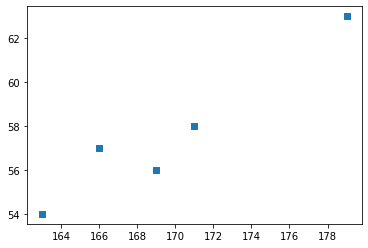

In [10]:
plt.scatter(X, Y, marker='s')
plt.show()

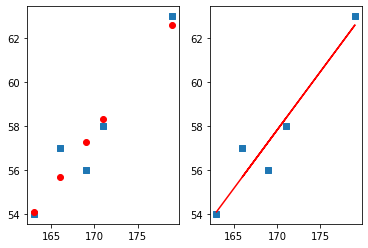

In [16]:
#입력한 X값과 예측한 Y값을 시각화
plt.subplot(1,2,1)
plt.scatter(X, Y, marker='s')
y_pred = lr.predict(X)
plt.scatter(X, y_pred, color='red')

plt.subplot(1,2,2)
plt.scatter(X, Y, marker='s')
y_pred = lr.predict(X)
#예측한 Y값을 직선으로 나타냄
plt.plot(X, y_pred, 'r')
plt.show()

* lr.score() : 모델의 점수 => 높을수록 데이터 정확도 up!!
* lr.coef : 학습된 선형 직선의 기울기

In [17]:
lr.score(X, Y)
print(lr.coef_, lr.intercept_)

[0.53125] -32.500000000000036


### 다중 선형회귀 분석

In [21]:
X = [[171,0],[169,0],[176,0],[168,0],[181,0],[166,0],[180,0],[175,0],
    [163,1],[162,1],[171,1],[162,1],[164,1],[162,1],[158,1],[173,1]]
Y = [69, 65, 72, 67, 71, 65, 80, 71, 55, 51, 59, 53, 61, 56, 47, 57]
lr.fit(X,Y)
print(lr.score(X,Y))
print(lr.coef_)
#0.66 의미 : 키가 1cm증가시 체중 0.66증가
#-9.26 의미 : 성별에 따라 체중 9.2kg 증가

0.8906355513939723
[ 0.66027053 -9.26509909]


* 168cm 남성과 168cm 여성의 체중 예측하기

In [22]:
test_X = [[168,0],[168,1]]
lr.predict(test_X)

array([66.53357974, 57.26848065])

# Boston 집값 예측

In [34]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
boston = load_boston()
print(boston.keys())
print(type(boston.data))
print(type(boston.target))

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/Users/juhun_park/miniconda3/envs/midterm/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

In [27]:
# 1)데이터프레임 타입 데이터로 생성
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset['mid_price'] = boston.target
print("========= dataset =========")
print(dataset)
print("====== data의 정보 출력 ======")
# df를 구성하는 행과 열의 크기, 컬럼명, 컬럼을 구성하는 값의 자료형 등을 출력
print(dataset.info())
print("==== 중복 데이터 확인 ====")
print(dataset.duplicated().sum())   #중복데이터 확인
print("==== 결측 데이터 확인 ====")
print(dataset.isna().sum())         #결측데이터 확인

========= dataset =========
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  mid_price  
0       15.3  396.90   4.98   

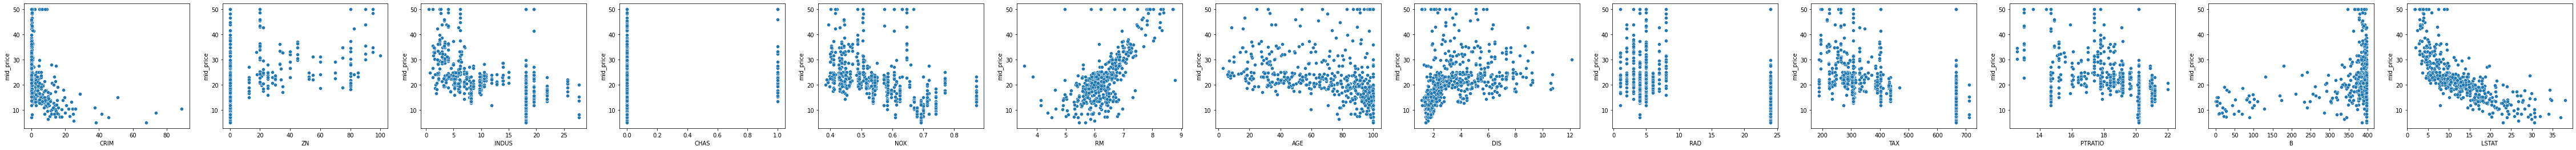

In [33]:
# 2) 시각화를 통한 데이터 탐색
plt.figure(figsize = (80, 4))
i = 1
for c in dataset.columns:
    if c != 'mid_price':
        plt.subplot(1, len(dataset.columns)-1, i)
        i += 1
        sns.scatterplot(x=c, y = 'mid_price', data=dataset)
plt.show()

== mid_price와 다른 변수간의 상관관계 ==
CRIM        -0.388305
ZN           0.360445
INDUS       -0.483725
CHAS         0.175260
NOX         -0.427321
RM           0.695360
AGE         -0.376955
DIS          0.249929
RAD         -0.381626
TAX         -0.468536
PTRATIO     -0.507787
B            0.333461
LSTAT       -0.737663
mid_price    1.000000
Name: mid_price, dtype: float64



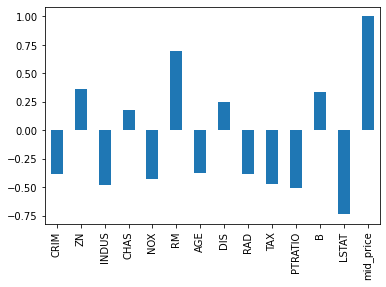

In [37]:
# 3) 상관계수 확인
res = dataset.corr()
print("== mid_price와 다른 변수간의 상관관계 ==")
print(res.loc['mid_price'])
print()
res.loc['mid_price'].plot.bar()
plt.show()

### 4) !! 데이터셋 분리 !!

In [38]:
#데이터 셋의 약 20%를 평가용으로 사용
test_set = dataset.iloc[ :100]
train_set = dataset.iloc[100: ]

# 입력 데이터에서는 'mid_price'열을 제외
# 정답 데이터로는 'mid_price'열만 사용
train_X = train_set.drop(['mid_price'], axis=1)
train_Y = train_set['mid_price']

test_X = test_set.drop(['mid_price'], axis=1)
test_Y = test_set['mid_price']

In [39]:
# 5) 다중 선형 회귀 모델 학습
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_X, train_Y)

LinearRegression()

0.7465346879380911


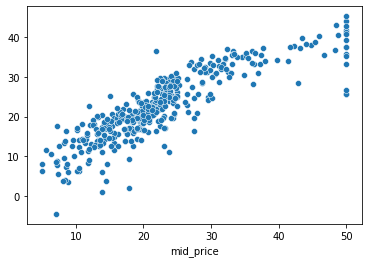

In [41]:
#학습된 모델 점수?
print(lr.score(train_X, train_Y))
#학습된 모델로 예측한 주택 가격 중앙값을 시각화
pred = lr.predict(train_X)
sns.scatterplot(x = train_Y, y = pred)
plt.show()

0.6377771855934964


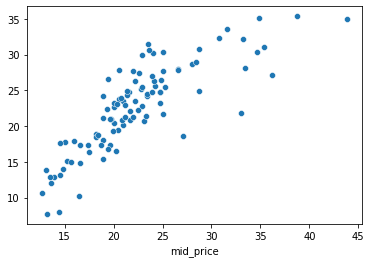

In [43]:
# 6) 학습된 모델 평가 => testset으로 모델 성능 검증
print(lr.score(test_X, test_Y))
# testset애 대한 예측 결과와 정답을 비교
pred = lr.predict(test_X)
sns.scatterplot(x = test_Y, y = pred)
plt.show()

In [45]:
# 7) 학습된 모델 해석
print("==== 다중선형회귀모델의 기울기 ====")
for i in range(len(train_X.columns)):
    print(train_X.columns[i], ":\t", lr.coef_[i]*1000)

==== 다중선형회귀모델의 기울기 ====
CRIM :	 -109.12483869914102
ZN :	 58.89962982722733
INDUS :	 53.21431135978682
CHAS :	 2531.364351313168
NOX :	 -21159.335829429
RM :	 3282.2854035720284
AGE :	 -4.043961150024836
DIS :	 -1783.2976866029403
RAD :	 318.77469408496705
TAX :	 -12.51808864189841
PTRATIO :	 -1011.8621860050721
B :	 9.287793522139857
LSTAT :	 -581.756268013623


* 기울기를 내림차순으로 정렬하기

In [47]:
coef = pd.Series(data=lr.coef_, index=train_X.columns)*1000
print(coef.sort_values(ascending=False))

RM          3282.285404
CHAS        2531.364351
RAD          318.774694
ZN            58.899630
INDUS         53.214311
B              9.287794
AGE           -4.043961
TAX          -12.518089
CRIM        -109.124839
LSTAT       -581.756268
PTRATIO    -1011.862186
DIS        -1783.297687
NOX       -21159.335829
dtype: float64


In [48]:
# 8) 모델 튜닝!!
dataset2 = dataset.drop(['ZN', 'INDUS', 'B', 'AGE', 'TAX'], axis = 1)
train_set = dataset2.iloc[100: ]
test_set = dataset2.iloc[ :100]

train_X = train_set.drop(['mid_price'], axis = 1)
train_Y = train_set['mid_price']
test_X = test_set.drop(['mid_price'], axis = 1)
test_Y = test_set['mid_price']

In [50]:
lr.fit(train_X, train_Y)
print("train score: ", lr.score(train_X, train_Y))
print("test score: ", lr.score(test_X, test_Y))

train score:  0.7276877334642398
test score:  0.6429009228353544
